In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/home/sashank/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sashank/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sashank/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sashank/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
import os
PATH = os.getcwd()
numpy.random.seed(7)

In [3]:
PATH

'/home/sashank/Documents/SmartGrid'

In [75]:
df = pd.read_excel(PATH+'/data/final_data.xlsx')

In [76]:
df.head()

,Unnamed: 0,Date,Hour,Market Demand,Ontario Demand,HOEP,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND,TotalOutput,Company_HOEP
0,0,2018-01-01,1,18974,16627,51.29,3,1583,4152,11671,0,992,18401,310
1,1,2018-01-01,2,18447,16084,43.59,1,1192,4093,11672,0,1124,18082,27
2,2,2018-01-01,3,18453,15866,93.60,0,1040,4231,11672,0,1265,18208,87
3,3,2018-01-01,4,18662,15725,54.78,0,1041,3895,11669,0,1369,17974,65
4,4,2018-01-01,5,18060,15470,14.35,0,1004,3271,11674,0,1848,17797,194


In [77]:
data_X = df[['Ontario Demand', 'HOEP']]
dataset = data_X.values
dataset = dataset.astype('float32')

In [78]:
data_X.head()

,Ontario Demand,HOEP
0,16627,51.29
1,16084,43.59
2,15866,93.60
3,15725,54.78
4,15470,14.35


In [79]:
# normalize the dataset
scaler = MinMaxScaler()
print(dataset.shape)
dataset = scaler.fit_transform(dataset)

(8760, 2)


In [80]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

5869 2891


In [81]:
test_hoep = test[:,1]
test_hoep = test_hoep.reshape(test_hoep.shape[0],1)
test_hoep.shape

(2891, 1)

In [82]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=48):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [83]:
# reshape into X=t and Y=t+48
look_back = 48
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [84]:
trainX[0:49]

array([[[0.4792503 , 0.15047428],
        [0.436491  , 0.12966517],
        [0.4193244 , 0.26481634],
        ...,
        [0.6516261 , 0.12439531],
        [0.57098985, 0.0335108 ],
        [0.5024017 , 0.0921817 ]],

       [[0.436491  , 0.12966517],
        [0.4193244 , 0.26481634],
        [0.40822113, 0.15990594],
        ...,
        [0.57098985, 0.0335108 ],
        [0.5024017 , 0.0921817 ],
        [0.45168912, 0.01810664]],

       [[0.4193244 , 0.26481634],
        [0.40822113, 0.15990594],
        [0.3881408 , 0.05064454],
        ...,
        [0.5024017 , 0.0921817 ],
        [0.45168912, 0.01810664],
        [0.41688323, 0.06437316]],

       ...,

       [[0.57098985, 0.0335108 ],
        [0.5024017 , 0.0921817 ],
        [0.45168912, 0.01810664],
        ...,
        [0.74328685, 0.17106721],
        [0.7335223 , 0.17082398],
        [0.7195054 , 0.1766073 ]],

       [[0.5024017 , 0.0921817 ],
        [0.45168912, 0.01810664],
        [0.41688323, 0.06437316],
        .

In [85]:
trainY.shape

(5820,)

In [86]:
trainX.shape

(5820, 48, 2)

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(30, return_sequences=True, input_shape=(look_back, 2)))
model.add(LSTM(30))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=32, verbose=2)

W1118 23:55:37.335019 140137027598144 deprecation_wrapper.py:119] From /home/sashank/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1118 23:55:37.592062 140137027598144 deprecation_wrapper.py:119] From /home/sashank/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1118 23:55:37.666597 140137027598144 deprecation_wrapper.py:119] From /home/sashank/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1118 23:55:38.210877 140137027598144 deprecation_wrapper.py:119] From /home/sashank/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 48, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


W1118 23:55:38.643429 140137027598144 deprecation.py:323] From /home/sashank/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1118 23:55:39.921372 140137027598144 deprecation_wrapper.py:119] From /home/sashank/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1118 23:55:40.121709 140137027598144 deprecation_wrapper.py:119] From /home/sashank/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/20
 - 14s - loss: 0.0272
Epoch 2/20
 - 9s - loss: 0.0071
Epoch 3/20
 - 10s - loss: 0.0041
Epoch 4/20
 - 11s - loss: 0.0032
Epoch 5/20
 - 13s - loss: 0.0025
Epoch 6/20
 - 12s - loss: 0.0018
Epoch 7/20
 - 10s - loss: 0.0014
Epoch 8/20
 - 10s - loss: 0.0011
Epoch 9/20
 - 11s - loss: 9.7230e-04
Epoch 10/20
 - 13s - loss: 8.5378e-04
Epoch 11/20
 - 12s - loss: 7.2833e-04
Epoch 12/20
 - 11s - loss: 6.2462e-04
Epoch 13/20
 - 11s - loss: 6.5140e-04
Epoch 14/20
 - 12s - loss: 5.6670e-04
Epoch 15/20
 - 13s - loss: 5.5542e-04
Epoch 16/20
 - 18s - loss: 5.1028e-04
Epoch 17/20
 - 19s - loss: 5.3412e-04
Epoch 18/20
 - 19s - loss: 4.7348e-04
Epoch 19/20
 - 11s - loss: 4.8804e-04
Epoch 20/20
 - 12s - loss: 5.0186e-04


In [100]:
predicted_value= model.predict(testX)

In [101]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testY,predicted_value)

0.0007409684

In [89]:
predicted_value.shape

(2842, 1)

In [90]:
testY.shape

(2842,)

In [98]:
import pickle
filename = 'finalized_model_2.sav'
pickle.dump(model, open(filename, 'wb'))

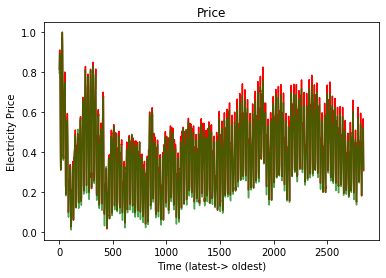

In [102]:
plt.plot(predicted_value, color= 'red')
plt.plot(testY, color='green',alpha=0.7)
plt.title("Price")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Electricity Price")
plt.show()

In [103]:
predicted_value = numpy.c_[predicted_value,test_hoep[look_back+1:,:]]

In [104]:
print(predicted_value.shape)
print(testX.shape)

(2842, 2)
(2842, 48, 2)


In [105]:
inverse_scaled_output = scaler.inverse_transform(predicted_value)
#inverse_scaled_actual = scaler.inverse_transform(testX)

In [44]:
testX[:,1].shape

(2842, 2)

In [45]:
predicted_value.shape

(2842, 3)

In [106]:
numpy.set_printoptions(suppress=True)
inverse_scaled_output

array([[20910.863  ,   136.95   ],
       [21135.014  ,   100.30999],
       [21743.996  ,    70.95   ],
       ...,
       [16361.07   ,     5.81   ],
       [15381.086  ,     2.87   ],
       [14462.165  ,     0.     ]], dtype=float32)

In [107]:
numpy.savetxt("values.csv", inverse_scaled_output, delimiter=",")